## Neural Net 과제

#### 개요
cifar-10 분류기를 위한 신경망 구현과 체인룰 정리
 
#### 데이터 출처
cifar-10 데이터

### 2 Layers Chain Rule 정리  
##### Forward
$ H = XW_1 + b_1$  
$ A = ReLU(H) $  
$ S = AW_2 + b_2 $  
$ P = Softmax(S) $    
$ L = -LogLikelihood(P) $  
##### Backward  
$ {\partial L \over \partial S} = P-T $ : T는 Label  
$ {\partial L \over \partial W_2} = {\partial S \over \partial W_2}{\partial L \over \partial S} =  A^T(P-T)$  
$ {\partial L \over \partial b_2} = 1 * {\partial L \over \partial S} = {\sum}(P-T) $  
$ {\partial L \over \partial A} = {\partial L \over \partial S}{\partial S \over \partial A} = (P-T)W_2^T $  
$ {\partial L \over \partial H} = {\partial A \over \partial H} {\partial L \over \partial A} $  
$ {\partial L \over \partial W_1} = {\partial H \over \partial W_1}{\partial L \over \partial H} = X^T {\partial L \over \partial H}  $  
$ {\partial L \over \partial b_1} = {\partial H \over \partial b_1}{\partial L \over \partial H} = {\sum \partial H}$  

In [2]:
from load_cifar_10 import *
import numpy as np
from model import TwoLayerNet

In [17]:
cifar_10_dir = 'cifar-10-batches-py'

train_data, train_filenames, train_labels, test_data, test_filenames, test_labels, label_names = \
load_cifar_10_data(cifar_10_dir)

def Processing_data(train, test):
    #change dtype
    train = np.array(train, dtype=np.float64)
    test = np.array(test, dtype=np.float64)
    
    #Reshaping
    train = np.reshape(train, (train.shape[0], -1))
    test = np.reshape(test, (test.shape[0], -1))
    
    #Normalizing
    mean_image = np.mean(train, axis = 0)
    #print(train.dtype)
    train -= mean_image
    test -= mean_image
    
    return train, test

In [18]:
train_data, test_data = Processing_data(train_data, test_data)

In [19]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(50000, 3072)
(50000,)
(10000, 3072)
(10000,)


In [20]:
# train_data = train_data[:5000]
# train_labels = train_labels[:5000]
# test_data = test_data[:1000]
# test_labels = test_labels[:1000]

In [21]:
train_data

array([[ -71.71074,  -74.05614,  -69.5538 , ...,   -3.63908,  -33.8503 ,
         -42.38186],
       [  23.28926,   40.94386,   54.4462 , ...,   16.36092,    7.1497 ,
          29.61814],
       [ 124.28926,  118.94386,  122.4462 , ...,  -46.63908,  -39.8503 ,
         -30.38186],
       ...,
       [ -95.71074,   41.94386,  102.4462 , ..., -114.63908,  -94.8503 ,
         -64.38186],
       [  58.28926,   74.94386,  107.4462 , ...,   68.36092,   64.1497 ,
          56.61814],
       [  98.28926,   92.94386,  106.4462 , ...,   36.36092,   37.1497 ,
          46.61814]])

In [42]:
input_size = 32 * 32 * 3
hidden_size = 256
output_size = 10
epoch_size = 100
batch_size = 32
learning_rate = 0.00005
N = train_data.shape[0]

In [43]:
nn = TwoLayerNet(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
vars(nn)

{'params': {'W1': array([[-7.25177760e-05, -1.46469463e-04,  2.20964991e-05, ...,
           6.82412013e-05,  1.66673619e-05, -7.57065687e-05],
         [ 1.97990283e-05, -1.38811907e-05, -5.06548340e-05, ...,
           1.27942212e-04,  1.18123044e-04,  4.25324367e-05],
         [ 6.24688324e-05,  1.60719406e-06, -1.36035855e-05, ...,
          -2.45487908e-05,  9.60242073e-05, -9.86819080e-05],
         ...,
         [ 1.45582655e-04, -1.28673172e-04,  5.65410250e-05, ...,
           3.17889054e-05, -7.80094860e-05, -6.48127830e-05],
         [ 5.17368057e-05,  1.00237103e-05,  1.49109173e-04, ...,
           1.15371148e-05, -8.50090107e-05,  1.22846249e-06],
         [ 1.81032510e-04, -8.36096975e-05, -6.85245038e-05, ...,
          -9.32022030e-05, -3.13585604e-05, -2.95667712e-05]]),
  'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.,

In [44]:
history = {'val_acc': [],'val_loss': []} 
for i in range(epoch_size):
    for j in range(N//batch_size):
        batch_mask = np.random.choice(N, batch_size)
        x_batch = train_data[batch_mask]
        t_batch = train_labels[batch_mask]
        
        nn.backward(x_batch, t_batch) 
    history["val_acc"].append(nn.accuracy(test_data, test_labels))
    history["val_loss"].append(nn.forward(test_data, test_labels))
    
    if i % 10 == 0:
        print(i, "test accuracy :", nn.accuracy(test_data, test_labels))
        print(i, "test loss     :", nn.forward(test_data, test_labels))

0 test accuracy : 0.2032
0 test loss     : 2.293957533421449
10 test accuracy : 0.299
10 test loss     : 1.9755451010432123
20 test accuracy : 0.3706
20 test loss     : 1.801869885533097
30 test accuracy : 0.3799
30 test loss     : 1.7543961688586633
40 test accuracy : 0.3919
40 test loss     : 1.7446008814225817
50 test accuracy : 0.3899
50 test loss     : 1.7736480684966187
60 test accuracy : 0.3383
60 test loss     : 2.5347357445378584
70 test accuracy : 0.3522
70 test loss     : 2.335783761918165
80 test accuracy : 0.3228
80 test loss     : 3.1784165633897
90 test accuracy : 0.2773
90 test loss     : 5.639905574066741


### 그림 그리기

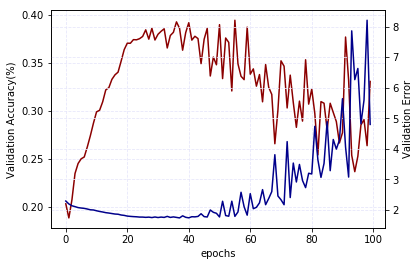

In [45]:
fig = plt.figure()
ax_acc = fig.add_subplot(111)

ax_acc.plot(range(epoch_size), history['val_acc'], label='정확도(%)', color='darkred')
#plt.text(3, 14.7, "<----------------정확도(%)", verticalalignment='top', horizontalalignment='right')
plt.xlabel('epochs')
plt.ylabel('Validation Accuracy(%)')
ax_acc.grid(linestyle='--', color='lavender')
ax_loss = ax_acc.twinx()
ax_loss.plot(range(epoch_size), history['val_loss'], label='오차', color='darkblue')
#plt.text(3, 2.2, "<----------------오차", verticalalignment='top', horizontalalignment='left')
plt.ylabel('Validation Error')
ax_loss.yaxis.tick_right()
ax_loss.grid(linestyle='--', color='lavender')

# 그래프 표시
plt.show()

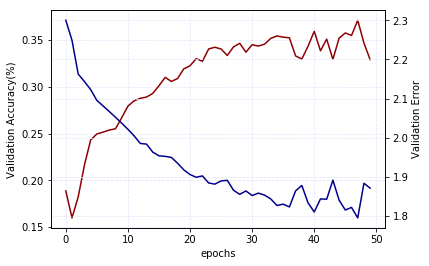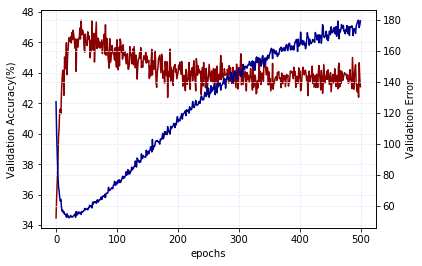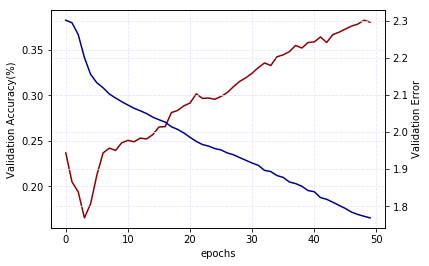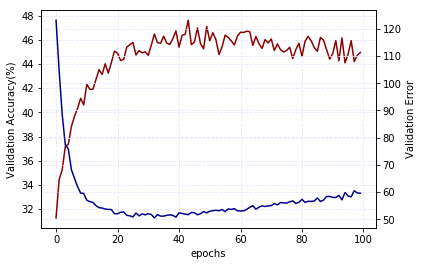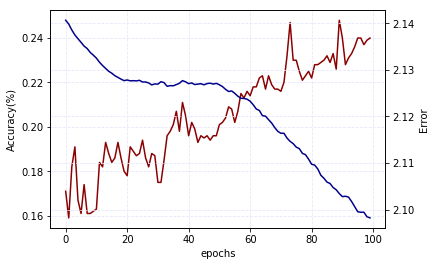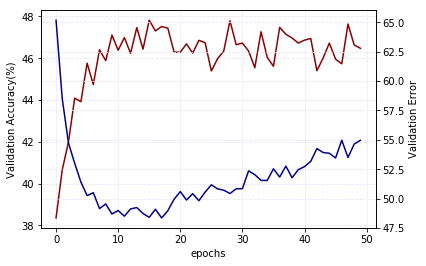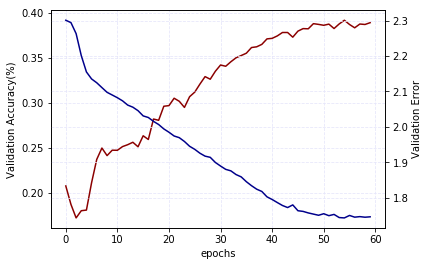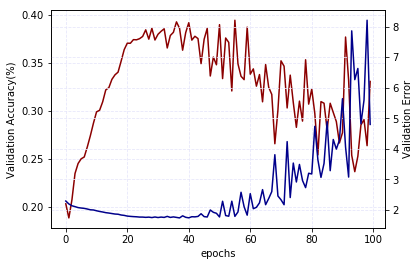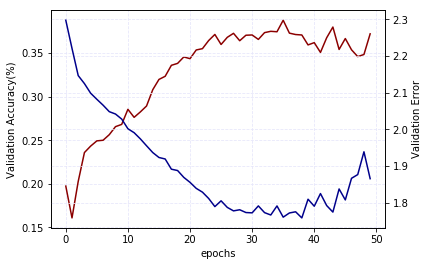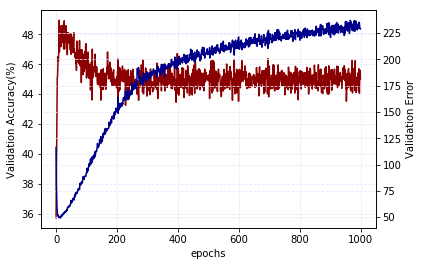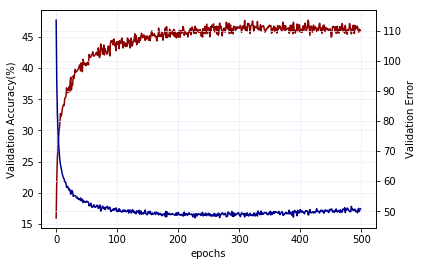

* 여러 파라미터로 돌려봤음에도 Acc 50의 선을 깨지 못했습니다...